## Implementing a Convolutional Neural Network Using Keras

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import tensorflow.keras as keras
import math
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import the Data Set and Create Training and Test Sets

The MNIST data set comes preloaded in Keras. The `load_data()` function returns the data set split into training and test subsets. 


In [2]:
# The mnist data set comes preloaded 
mnist = keras.datasets.mnist

# Create training and test sets
(X_train, y_train),(X_test, y_test) = mnist.load_data()


### Inspect the Data

In [3]:
print (f"X_train shape: {X_train.shape}, X_train Datatype: {X_train.dtype}")
print (f"y_train shape: {y_train.shape}, y_train Datatype: {y_train.dtype}")
print (f"X_test shape: {X_test.shape}, X_test Datatype: {X_test.dtype}")
print (f"y_test shape: {y_test.shape}, y_test Datatype: {y_test.dtype}")

X_train shape: (60000, 28, 28), X_train Datatype: uint8
y_train shape: (60000,), y_train Datatype: uint8
X_test shape: (10000, 28, 28), X_test Datatype: uint8
y_test shape: (10000,), y_test Datatype: uint8


In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Visualize the Data

Seaborn`heatmap()` function to display any image contained in `X_train`.

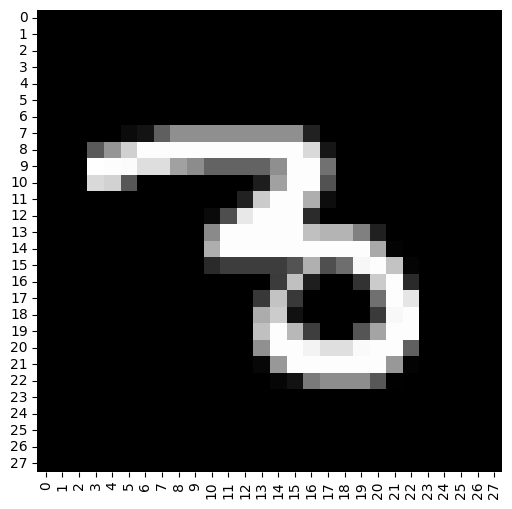

In [6]:
# choose which image in the set to evaluate and view using the heatmap
img_index = 30
img_shape = X_train[img_index]
plt.figure(figsize=(6,6))
sns.heatmap(img_shape, cmap='gray', cbar=False)
plt.show()

In [7]:
print(y_train[30])

3


The number that appeared in my heatmap was 3, and it did match its label in the training set.

In [8]:
# Function to visualize the data
def plot_imgs(images, labels=None):
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10,2*subplots_x))
    for i in range(min(len(images), subplots_x*5)):
        plt.subplot(subplots_x,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()
    

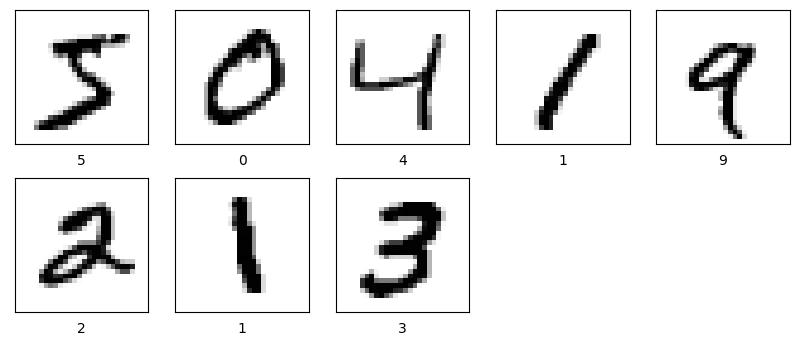

In [9]:
# Visualize some training examples
plot_imgs(X_train[:8], y_train[:8])

## Prepare the Data for a CNN

In [10]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0
print(f"X train normalized: {X_train_norm}")
print(f"X test normalized: {X_test_norm}")

X train normalized: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0.

#### Reshape the Data
A CNN in Keras requires a 4-dimensional array as input in the form: `(num_examples, image_dimension_X, image_dimension_Y, num_channels)`.

Since grayscale has only one color channel, every example in `X_train` would have the shape `(28, 28, 1)`. `X_test` should have the same dimensions.

In [11]:
X_train = np.reshape(X_train, (X_train_norm.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test_norm.shape[0], 28, 28, 1))
X_train
X_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


## Construct the Convolutional Neural Network

In [12]:
# 1. Create CNN model object

cnn_model = keras.Sequential()


# 2. Create the input layer and add it to the model object: 
input_shape = X_train.shape[1:]
print(input_shape)
input_layer = keras.layers.InputLayer(input_shape)
cnn_model.add(input_layer)

# 3. Create the first convolutional layer and add it to the model object:
conv_1 = keras.layers.Conv2D(filters=16, kernel_size=3)
cnn_model.add(conv_1)
batchNorm_1 = keras.layers.BatchNormalization()
cnn_model.add(batchNorm_1)
ReLU_1 = keras.layers.ReLU()
cnn_model.add(ReLU_1)


# 4. Create the second convolutional layer and add it to the model object:
conv_2 = keras.layers.Conv2D(filters=32, kernel_size=3)
cnn_model.add(conv_2)
batchNorm_2 = keras.layers.BatchNormalization()
cnn_model.add(batchNorm_2)
ReLU_2 = keras.layers.ReLU()
cnn_model.add(ReLU_2)


# 5. Create the third convolutional layer and add it to the model object:
conv_3 = keras.layers.Conv2D(filters=64, kernel_size=3)
cnn_model.add(conv_3)
batchNorm_3 = keras.layers.BatchNormalization()
cnn_model.add(batchNorm_3)
ReLU_3 = keras.layers.ReLU()
cnn_model.add(ReLU_3)


# 6. Create the fourth convolutional layer and add it to the model object:
conv_4 = keras.layers.Conv2D(filters=128, kernel_size=3)
cnn_model.add(conv_4)
batchNorm_4 = keras.layers.BatchNormalization()
cnn_model.add(batchNorm_4)
ReLU_4 = keras.layers.ReLU()
cnn_model.add(ReLU_4)



# 7. Create the pooling layer and add it to the model object:
pooling_layer = keras.layers.GlobalAveragePooling2D()
cnn_model.add(pooling_layer)


# 8. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=10)
cnn_model.add(output_layer)

cnn_model.summary()

(28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 16)        64        
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 

### Define the Optimization Function

Create a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`

In [18]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Define the loss function

Create a sparse categorical cross entropy loss function using `keras.losses.SparseCategoricalCrossentropy()`. It is used when there are two or more label classes and the labels are integers.

In [19]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Step 4. Compile the model

<b>Task:</b> In the code cell below, package the network architecture with the optimizer and the loss function using the `cnn_model.compile()` method. Specify the optimizer, loss function and the accuracy evaluation metric as arguments.

In [22]:
cnn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

## Part 5. Fit the Model to the Training Data

We can now fit the CNN model to the training data. Since there are 60,000 training examples and nearly 100,000 parameters to fit, this may take a while to run. Therefore, we will only choose one epoch in this assignment.

<b>Task:</b> In the code cell below, fit the CNN model to the training data using the `fit()` method. Call `cnn_model.fit()` with the following arguments:
1. The training data sets.
2. The number of epochs.

Save the results to the variable `history`. 

<b>Note</b>: This may take a while to run.

In [23]:
num_epochs = 1 # Number of epochs

t0 = time.time() # start time

history = cnn_model.fit(X_train, y_train, epochs=num_epochs)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

1875/1875 [==============================] - 66s 35ms/step - loss: 0.3460 - accuracy: 0.9173
Elapsed time: 66.37s


## Part 6. Evaluate the Model's Performance

Let's now evaluate our CNN model's performance on our test data and see how it did.


<b>Task:</b> In the code cell below, call the `cnn_model.evaluate()` method with the test data sets as arguments. The `evaluate()` method returns a list containing two values. The first value is the loss and the second value is the accuracy score. 


In [24]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

313/313 [==============================] - 3s 10ms/step - loss: 0.3539 - accuracy: 0.8843
Loss:  0.35387328267097473 Accuracy:  0.8842999935150146


Next we'll make some predictions on the test set and see for ourselves how accurate these predictions are.

<b>Task:</b> In the code cell below, call the `plot_imgs()` functions with the first 25 images in `X_test` as the first argument, and the first 25 labels in `predictions` as the second argument. 

The result should be a display of the first 25 images in the test set `X_test`, and below each image, a display of the predicted digit. How well did we do?

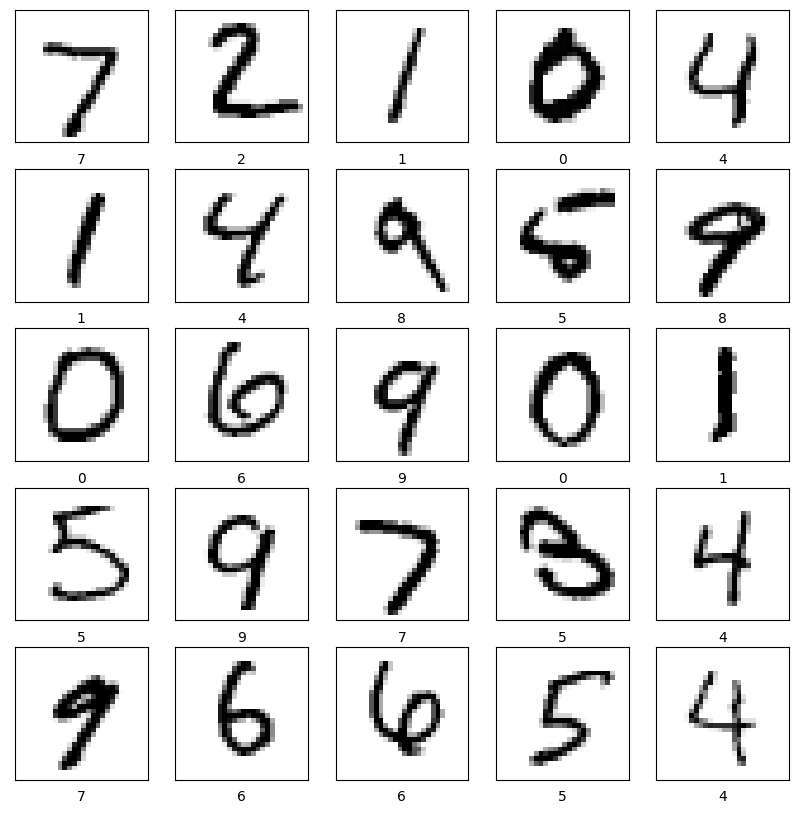

In [25]:
# Make predictions on the test set
logits = cnn_model.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
plot_imgs(X_test[:25], predictions[:25])